In [20]:
# Importing all the necessary tools
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


In [21]:
#Importing dataset
db = tf.keras.datasets.mnist
#Dividing Dataset into Training and Testing Data
(x_train,y_train),(x_test,y_test) = db.load_data()


In [22]:
#Normalization
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [53]:
#Making the Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(64,activation = 'relu')) 
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=2)    
model.save('handwritten_digits.model')#Saving the model to use it later

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.9183
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1155 - accuracy: 0.9650


INFO:tensorflow:Assets written to: handwritten_digits.model\assets


INFO:tensorflow:Assets written to: handwritten_digits.model\assets


In [54]:
# Testing the model on the test data
model = tf.keras.models.load_model('handwritten_digits.model')
loss,accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1040 - accuracy: 0.9684
0.10403714329004288
0.9684000015258789


1/1 [==============================] - 0s 51ms/step
This is number 8


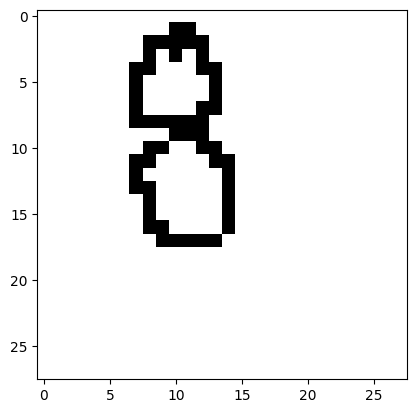

1/1 [==============================] - 0s 18ms/step
This is number 1


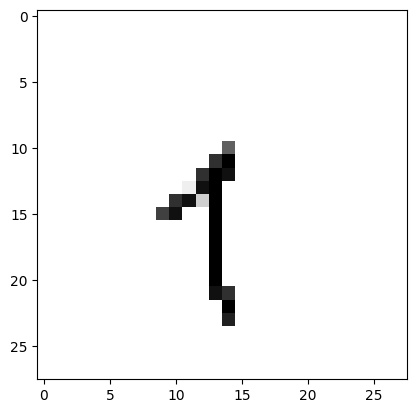

1/1 [==============================] - 0s 18ms/step
This is number 1


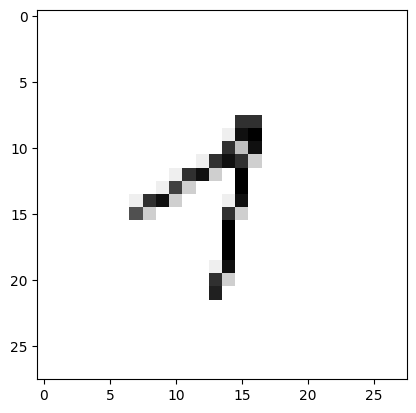

1/1 [==============================] - 0s 20ms/step
This is number 4


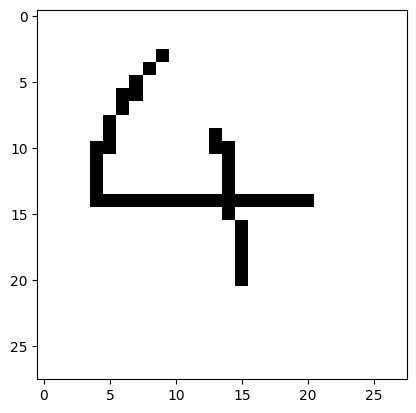

1/1 [==============================] - 0s 20ms/step
This is number 9


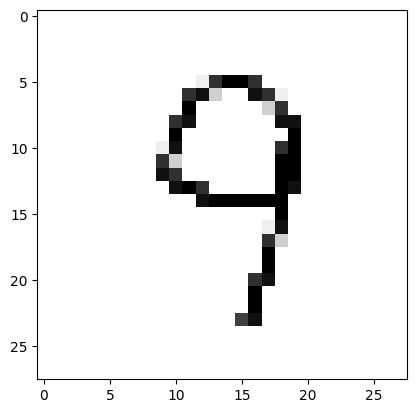

1/1 [==============================] - 0s 16ms/step
This is number 0


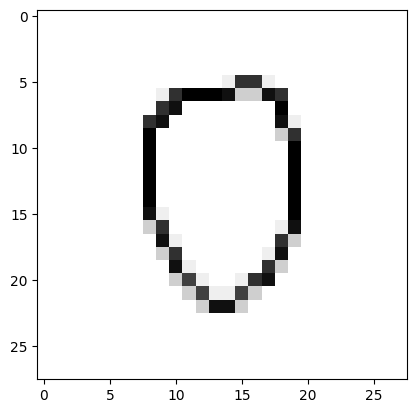

1/1 [==============================] - 0s 26ms/step
This is number 8


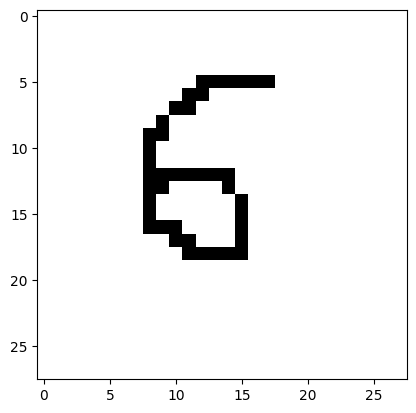

1/1 [==============================] - 0s 18ms/step
This is number 3


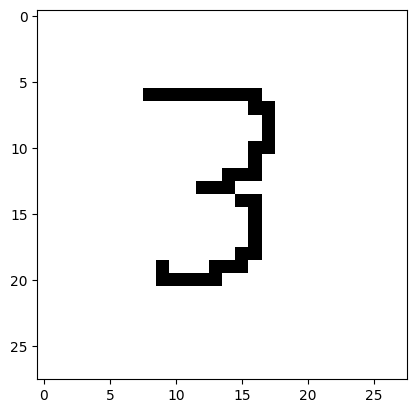

1/1 [==============================] - 0s 18ms/step
This is number 2


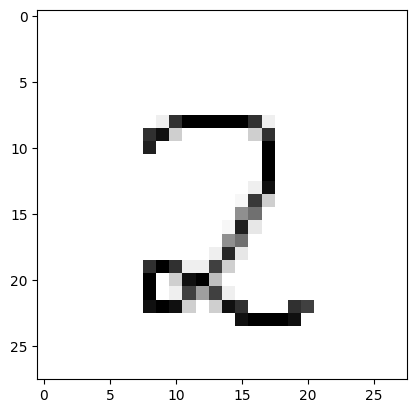

1/1 [==============================] - 0s 20ms/step
This is number 2


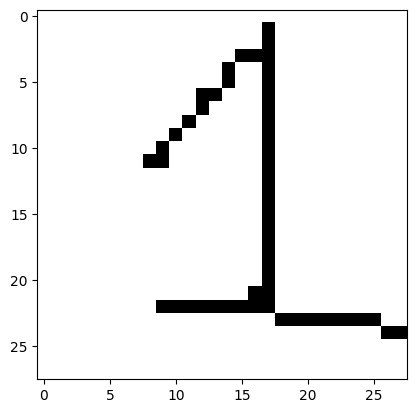

1/1 [==============================] - 0s 16ms/step
This is number 7


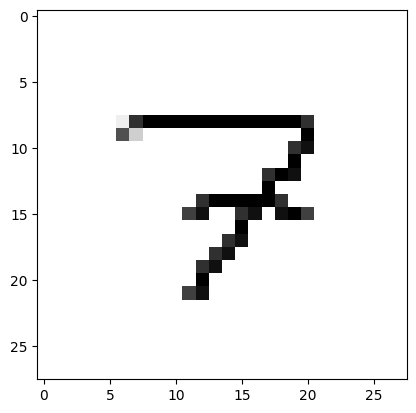

1/1 [==============================] - 0s 18ms/step
This is number 8


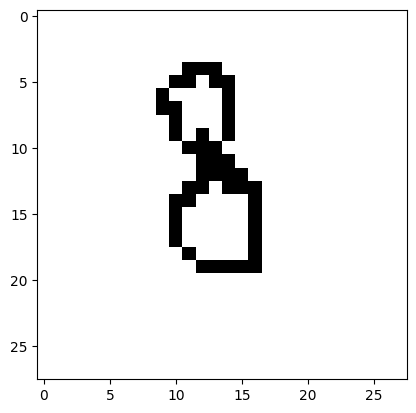

In [57]:
#Using the model to Identify the Handwritten Digits
model = tf.keras.models.load_model('handwritten_digits.model')
image_number = 1
while os.path.isfile(f"Images/image_{image_number}.png"):
    try:
        img = cv2.imread(f"Images/image_{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This is number {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print('error!')
    finally:
        image_number=image_number + 1
  